<a href="https://colab.research.google.com/github/Ulysse3311/ESILV-Deep-Learning/blob/main/Ulysse_BERTHET_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# data from https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
#1
try :
  %tensorflow_version 2.x
except Exeption :
  pass

In [2]:
#2,3
from __future__ import absolute_import,division,print_function,unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.0


In [3]:
#4
data=keras.datasets.cifar10
cifar10_data=data.load_data()

In [4]:
print(len(cifar10_data))
print(type(cifar10_data))

2
<class 'tuple'>


In [5]:
#6 unpacking data 
(train_imgs,train_labels),(test_imgs,test_labels)=cifar10_data

In [6]:
#7
class_names = [ "airplane " , "automobile " , "bird " , "cat " , "deer ", "dog " , "frog ","horse " , "ship " , "truck "]
print(train_imgs[0].shape)
print(train_imgs[0])

(32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


exemples from the training data :

In [7]:
#8
print("images : ")
print(len(train_imgs))
print(train_imgs.shape)
print("labels : ")
print(len(train_labels))
print(train_labels.shape)

images : 
50000
(50000, 32, 32, 3)
labels : 
50000
(50000, 1)


500000 images <br>
32 pixels high <br>
32 pixels wide <br>
each pixel defined in RGB 3x[0:255]<br>

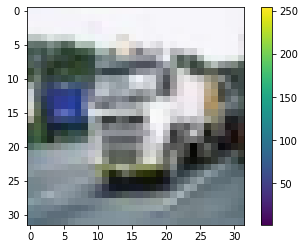

'truck '

In [8]:
#9
index = 1000
plt.figure()
plt.imshow(train_imgs[ index ])
plt.colorbar()
plt.grid( False )
plt.show()
class_names[train_labels[index][0]]

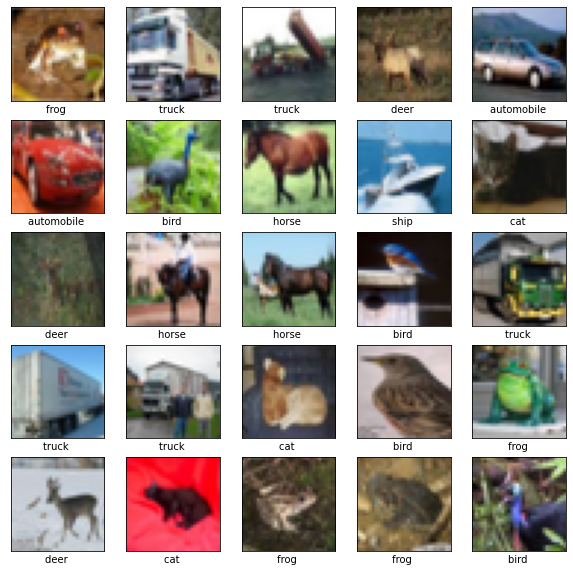

In [9]:
#10
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_imgs[i])
    plt.xticks ([])
    plt.yticks ([])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [10]:
#11 scaling:
train_imgs=train_imgs/255.0

In [13]:
#12, first neural network 3 layers, 2 activation funcitons
# layer 1 : flaten, from 32x32 matrix to 1024 list
# layer 2 : 128 relu nodes
# layer 3 : 10 softmax nodes (output)
model=keras.Sequential([keras.layers.Flatten(input_shape=(32,32,3)),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')])

In [14]:
#13 training parameters:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
#14
model.fit(train_imgs,train_labels,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 2ms/step - loss: 2.0138 - accuracy: 0.2730
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7900 - accuracy: 0.3632
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7299 - accuracy: 0.3835
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6946 - accuracy: 0.3975
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6723 - accuracy: 0.4054
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6646 - accuracy: 0.4075
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6427 - accuracy: 0.4124
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6344 - accuracy: 0.4150
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6315 - accuracy: 0.4166
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.616

In [16]:
#15 test on the test set :
test_loss,test_acc=model.evaluate(test_imgs,test_labels,verbose=2)

313/313 - 0s - loss: 200.9522 - accuracy: 0.3632


In [17]:
#16 make predictions:
predictions=model.predict(test_imgs)
print(predictions[0],"class : ",np.argmax(predictions[0]))
print(predictions[1],"class : ",np.argmax(predictions[1]))
print(predictions[2],"class : ",np.argmax(predictions[2]))


[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] class :  8
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] class :  1
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] class :  8


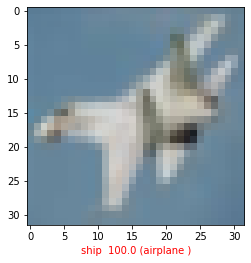

In [18]:
#17
def check_predict(index):
  success = 'red'
  a = np.argmax(predictions[index])
  if  a == test_labels[index][0]:
    success = 'blue'
  plt.imshow(test_imgs[index])
  xlab=f"{class_names[a]} {100*predictions[index][a].round(0)} ({class_names[test_labels[index][0]]})"
  plt.xlabel(xlab, c = success)


check_predict(10)

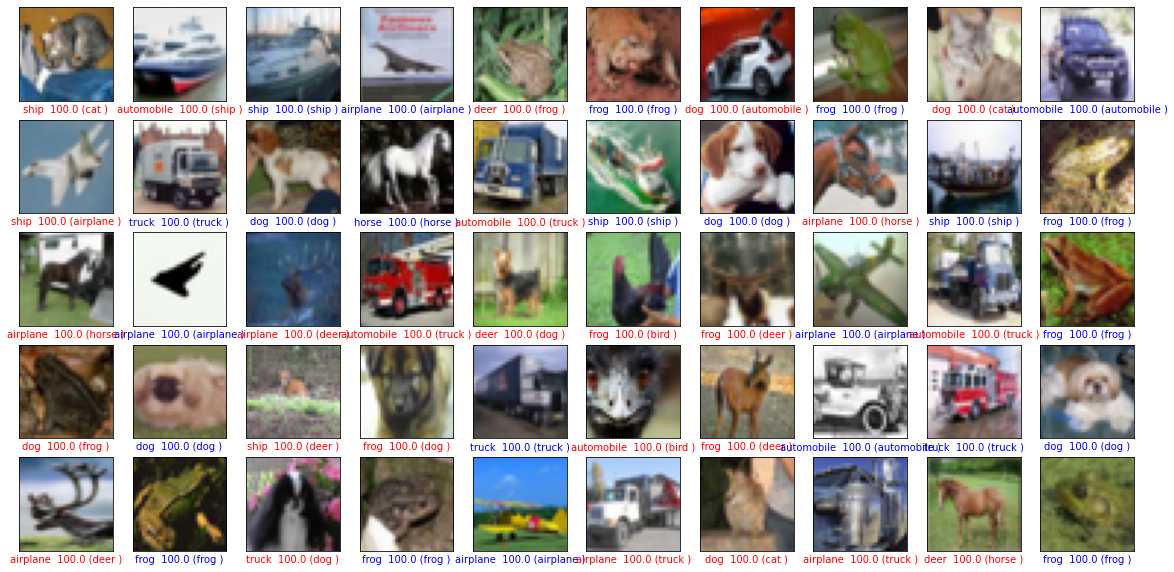

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [19]:
# 18
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    check_predict(i)
    plt.xticks ([])
    plt.yticks ([])
plt.show()

model.predict(np.expand_dims(test_imgs[5],axis=0))


In [20]:
# 19 improving the model 
# more layers
model2=keras.Sequential([keras.layers.Flatten(input_shape=(32,32,3)),
                        keras.layers.Dense(526,activation='relu'),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.fit(train_imgs,train_labels,epochs=20)
test_loss,test_acc=model2.evaluate(test_imgs,test_labels,verbose=2)

Epoch 1/20
1563/1563 [==============================] - 3s 2ms/step - loss: 2.0101 - accuracy: 0.2900
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6976 - accuracy: 0.3920
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5989 - accuracy: 0.4263
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5497 - accuracy: 0.4476
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5045 - accuracy: 0.4606
Epoch 6/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4792 - accuracy: 0.4691
Epoch 7/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4519 - accuracy: 0.4817
Epoch 8/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4380 - accuracy: 0.4852
Epoch 9/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4060 - accuracy: 0.4971
Epoch 10/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.390

In [23]:
test_loss,test_acc=model2.evaluate(test_imgs,test_labels,verbose=2)

313/313 - 0s - loss: 390.7835 - accuracy: 0.4025


10 % improvement from the last model

In [21]:
# loss is not stabilized so we add more epochs
model2.fit(train_imgs,train_labels,epochs=50)
test_loss,test_acc=model2.evaluate(test_imgs,test_labels,verbose=2)

Epoch 1/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2566 - accuracy: 0.5494
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2487 - accuracy: 0.5536
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2358 - accuracy: 0.5564
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2324 - accuracy: 0.5583
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2241 - accuracy: 0.5614
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2177 - accuracy: 0.5635
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2091 - accuracy: 0.5671
Epoch 8/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2024 - accuracy: 0.5686
Epoch 9/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.1919 - accuracy: 0.5725
Epoch 10/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.188

accuracy is lower, overfitting ? 

In [26]:
# one more layer
model3=keras.Sequential([keras.layers.Flatten(input_shape=(32,32,3)),
                        keras.layers.Dense(526,activation='relu'),
                        keras.layers.Dense(526,activation='relu'),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')])
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(train_imgs,train_labels,
           epochs=20,
           batch_size=4)
test_loss,test_acc=model3.evaluate(test_imgs,test_labels,verbose=2)

Epoch 1/20
12500/12500 [==============================] - 22s 2ms/step - loss: 2.1089 - accuracy: 0.1937
Epoch 2/20
12500/12500 [==============================] - 22s 2ms/step - loss: 1.9768 - accuracy: 0.2449
Epoch 3/20
12500/12500 [==============================] - 22s 2ms/step - loss: 1.9474 - accuracy: 0.2488
Epoch 4/20
12500/12500 [==============================] - 22s 2ms/step - loss: 1.9368 - accuracy: 0.2558
Epoch 5/20
12500/12500 [==============================] - 22s 2ms/step - loss: 1.9304 - accuracy: 0.2585
Epoch 6/20
12500/12500 [==============================] - 22s 2ms/step - loss: 1.9193 - accuracy: 0.2632
Epoch 7/20
12500/12500 [==============================] - 22s 2ms/step - loss: 1.8849 - accuracy: 0.2937
Epoch 8/20
12500/12500 [==============================] - 21s 2ms/step - loss: 1.8501 - accuracy: 0.3188
Epoch 9/20
12500/12500 [==============================] - 21s 2ms/step - loss: 1.8327 - accuracy: 0.3292
Epoch 10/20
12500/12500 [==============================

In [13]:
#grid search
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
res=[]
for b in batch_size:
  for e in epochs: 
    mod=keras.Sequential([keras.layers.Flatten(input_shape=(32,32,3)),
                            keras.layers.Dense(128,activation='relu'),
                            keras.layers.Dense(10,activation='sigmoid')])
    mod.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    mod.fit(train_imgs,train_labels,
              epochs=e,
              batch_size=b)
    test_loss,test_acc=mod.evaluate(test_imgs,test_labels,verbose=2)
    res.append((test_acc,b,e))
for r in res :
  print(f"\n accuracy : {r[0]} batch size : {r[1]} nb epochs : {r[2]}")

Epoch 1/10
5000/5000 [==============================] - 8s 2ms/step - loss: 2.0001 - accuracy: 0.2705
Epoch 2/10
5000/5000 [==============================] - 8s 2ms/step - loss: 1.8167 - accuracy: 0.3423
Epoch 3/10
5000/5000 [==============================] - 8s 2ms/step - loss: 1.7732 - accuracy: 0.3586
Epoch 4/10
5000/5000 [==============================] - 8s 2ms/step - loss: 1.7521 - accuracy: 0.3722
Epoch 5/10
5000/5000 [==============================] - 8s 2ms/step - loss: 1.7329 - accuracy: 0.3702
Epoch 6/10
5000/5000 [==============================] - 8s 2ms/step - loss: 1.7271 - accuracy: 0.3765
Epoch 7/10
5000/5000 [==============================] - 8s 2ms/step - loss: 1.7157 - accuracy: 0.3818
Epoch 8/10
5000/5000 [==============================] - 8s 2ms/step - loss: 1.7074 - accuracy: 0.3839
Epoch 9/10
5000/5000 [==============================] - 8s 2ms/step - loss: 1.7051 - accuracy: 0.3850
Epoch 10/10
5000/5000 [==============================] - 8s 2ms/step - loss: 1.697